In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Random Forest Classifier Workflow for Classifying Heart Disease

In [2]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# create X(all the feature columns)
X = heart_disease.drop('target', axis=1)

#create y(the target column)
y=heart_disease['target']

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
# check if balanced data set
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [8]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

## 2.Choose the model and hyperparameters¶

This is often referred to as model or clf (short for classifier) or estimator (as in the Scikit-Learn) documentation.

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

In [10]:
# We'll leave the hyperparameters as default to begin with...
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. Fit the model to the data and use it to make a prediction

Fitting the model on the data involves passing it the data and asking it to figure out the patterns.

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels.

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 4 Use the model to make a prediction

Once our model instance is trained, you can use the predict() method to predict a target value given a set of features. In other words, use the model, along with some unlabelled data to predict the label.

In [12]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [13]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X_test)

# 5. Evaluate the model

In [14]:
# Evaluate the model on the training set
clf.score(X_train, y_train)

1.0

In [15]:
# Evaluate the model on the test set
clf.score(X_test, y_test)

0.868421052631579

There are also a number of other evaluation methods we can use for our models.

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.86      0.90      0.88        40

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [17]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[30,  6],
       [ 4, 36]], dtype=int64)

In [18]:
accuracy_score(y_test, y_preds)

0.868421052631579

## 6. Experiment to improve

The first model you build is often referred to as a baseline.

The next step in the workflow is to try and improve upon your baseline model.

Try different hyperparameters

All different parameters should be cross-validated

Different models you use will have different hyperparameters you can tune. For the case of our model, the RandomForestClassifier(), we'll start trying different values for n_estimators.

In [19]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with{i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")


Trying model with10 estimators...
Model accuracy on test set: 80.26315789473685%

Trying model with20 estimators...
Model accuracy on test set: 82.89473684210526%

Trying model with30 estimators...
Model accuracy on test set: 86.8421052631579%

Trying model with40 estimators...
Model accuracy on test set: 85.52631578947368%

Trying model with50 estimators...
Model accuracy on test set: 86.8421052631579%

Trying model with60 estimators...
Model accuracy on test set: 84.21052631578947%

Trying model with70 estimators...
Model accuracy on test set: 84.21052631578947%

Trying model with80 estimators...
Model accuracy on test set: 86.8421052631579%

Trying model with90 estimators...
Model accuracy on test set: 88.1578947368421%



In [20]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.26315789473685%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 85.52631578947368%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 82.89473684210526%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 85.52631578947368%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 86.8421052631579%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 85.52631578947368%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 88.1578947368421%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 88.1578947368421%
Cross-validation score: 82.8142076502732

In [21]:
 #Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)


# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
grid.best_params_

{'n_estimators': 80}

In [22]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
# Fit the best model
clf = clf.fit(X_train, y_train)

In [24]:
# Find the best model scores
clf.score(X_test, y_test)

0.8289473684210527

# 7. Save a model for someone else to use

When you've done a few experiments and you're happy with how your model is doing, you'll likely want someone else to be able to use it.

This may come in the form of a teammate or colleague trying to replicate and validate your results or through a customer using your model as part of a service or application you offer.

Saving a model also allows you to reuse it later without having to go through retraining it. Which is helpful, especially when your training times start to increase.

You can save a scikit-learn model using Python's in-built pickle module.

In [25]:
import pickle
# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [26]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8421052631578947

# working with data that's not numerical

In [27]:
# Impoort car sales
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [29]:
# Split into X & y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
dummies = pd.get_dummies(car_sales[["Make","Colour"]])
dummies.head()

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0


In [32]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
model.score(X_test, y_test)

0.0

# 2 What if there were missing values?

In [34]:
# Import car sales dataframe with missing values
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(4)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0


In [35]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
car_sales_missing.isna().any()

Make             True
Colour           True
Odometer (KM)    True
Doors            True
Price            True
dtype: bool

What we'll do is fill the rows where categorical values are missing with "missing", the numerical features with the mean or 4 for the doors. And drop the rows where the Price is missing.

We could fill Price with the mean, however, since it's the target variable, we don't want to be introducing too many fake labels.

Note: The practice of filling missing data is called imputation. And it's important to remember there's no perfect way to fill missing data. The methods we're using are only one of many. The techniques you use will depend heavily on your dataset. A good place to look would be searching for "data imputation techniques".

In [37]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

In [38]:
car_sales_missing["Colour"].fillna("missing", inplace=True)

In [39]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [40]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [41]:
# Check our dataframe
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

In [43]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
car_sales_missing.shape

(950, 5)

In [45]:
# Now let's one-hot encode the categorical columns (copied from above)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [46]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Drop the rows with missing in the "Price" column
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [51]:
# Fill categorical values with 'missing' & numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

In [52]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [53]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [54]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,71934
1,Toyota,Red,4,162665
2,Honda,White,4,42844
3,Honda,White,4,195829
4,Honda,Blue,4,219217


In [56]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [57]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

# Choosing the right estimator/algorithm for your problem


https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [58]:

# Import the Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston; # imports as dictionary

In [59]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
# How many samples?
len(boston_df)

506

In [61]:
# import the Ridge model class from the linear model module
from sklearn.linear_model import Ridge

#Setup Random seed
np.random.seed(42)

#create the data
X =boston_df.drop("target", axis=1)
y =boston_df["target"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model
model.score(X_test, y_test)

0.6662221670168522

In [62]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Check the score of the model
model.score(X_test, y_test)

0.873969014117403

# Picking a machine learning model for a classification problem

In [63]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# How many samples are there?
len(heart_disease)

303

In [65]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

C:\Users\Henry\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [67]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

# 3. Fit the model to data and using it to make predictions

In [68]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [71]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [72]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [73]:
model.predict(X_test)

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [74]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

# 4. Evaluating a model

Scikit-Learn implements 3 different methods of evaluating models.

The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

In [75]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.873969014117403

In [76]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [77]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [78]:
# Using cross_val_score()
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [79]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [80]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

Accuracy

Area under ROC curve

Confusion matrix

Classification report

In [81]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


In [82]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

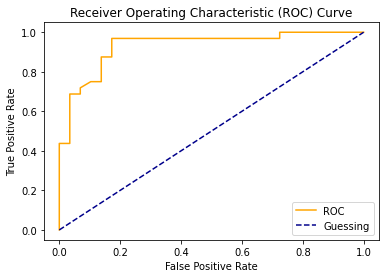

In [83]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.9304956896551724

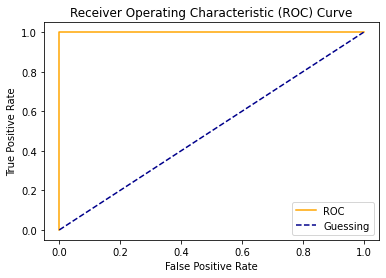

In [84]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [86]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

# Confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [87]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [88]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


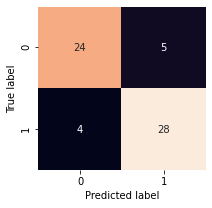

In [89]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat)

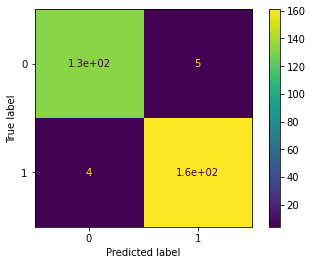

In [90]:
# Returns an error.... (at time of writing)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

# Classification report

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Each term measures something slightly different:

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).
When should you use each?

*It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

*For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

*You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

*In this case, you'd want to turn to metrics such as precision, recall and F1 score.